<a href="https://colab.research.google.com/github/anushadatar/Olin-Data-Science-SP20/blob/master/07_dataframes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataframes

Elements of Data Science

by [Allen Downey](https://allendowney.com)

[MIT License](https://opensource.org/licenses/MIT)

### Goals

This notebook introduces Pandas, which is a powerful library for working with data.  Pandas provides functions for reading data from files, and it provides two new types for working with data, DataFrames and Series.

We'll use these tools to estimate the average birth weight of babies in the U.S.  This example demonstrates the important steps in almost any data science project:

1. Identifying data that can answer a question.

2. Obtaining the data and loading it in Python.

3. Checking the data and dealing with errors.

4. Selecting the relevant subsets from the data.

5. Using histograms to visualize a distribution of values.

6. Using summary statistics to describe the data in a way that best answers the question.

7. Considering possible sources of error and limitations in our conclusions.

Because this notebook presents a data science project from end to end, it is a little longer than some of the previous notebooks.  So, hang in there!

# DataFrames and Series

The fundamental goal of data science is to use data to answer questions and guide decision making.

As an example, we'll start with a simple question: what is the average birth weight of babies in the United States?

To answer a question like this, we have to find an appropriate dataset or run an experiment to collect it.  Then we have to get the data into our development environment and prepare it for analysis, which involves cleaning and validation.

For this question we'll use data from the [National Survey of Family Growth](https://www.cdc.gov/nchs/nsfg/index.htm), which is available from the National Center for Health Statistics.

Their 2013-2015 dataset includes information about a sample of women in the U.S. and their children.  

The Python library we'll use to read and analyze data is Pandas, which we'll import as `pd`.

In [0]:
import pandas as pd

Pandas can read data in most common formats, including CSV, Excel, and the format the NSFG data is in, HDF5.  [You can read about HDF here](https://en.wikipedia.org/wiki/Hierarchical_Data_Format).

In [0]:
import os

if not os.path.exists('nsfg.hdf5'):
    !wget https://github.com/AllenDowney/ElementsOfDataScience/raw/master/nsfg.hdf5

In [64]:
nsfg = pd.read_hdf('nsfg.hdf5')
type(nsfg)

pandas.core.frame.DataFrame

The result from `read_hdf()` is a DataFrame, which is the primary type Pandas uses to store data.

For each woman who participated in the survey, this DataFrame has one row for each pregnancy and one column for each survey question.

DataFrame has a method called `head()` that shows the first 5 rows:

In [65]:
nsfg.head()

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,birthord,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,1.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,2.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,3.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,NaN,2484.535358
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,1.0,24.0,2903.782914


DataFrames provide "attributes" and "methods".

A method is a function that is associated with a particular type.  For example, in a previous notebook, we used the `split` method, which is a function that works with strings.

An attribute is a variable associated with a particular type.  For example, DataFrame has an attribute called `shape`, which is the number of rows and columns:

In [66]:
nsfg.shape

(9358, 11)

There are 9358 rows in this dataset, one for each pregnancy, and 11 columns, one for each survey question.

DataFrame also has an attribute called `columns`, which contains the column names:

In [67]:
nsfg.columns

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'birthord', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

The column names are stored in an `Index`, which is another Pandas type, similar to a list:

In [68]:
type(nsfg.columns)

pandas.core.indexes.base.Index

Based on the column names, you might be able to guess what some of the variables are, but in general you have to read the documentation.

**Exercise:** When you work with datasets like the NSFG, it is important to read the documentation carefully. If you interpret a variable incorrectly, you can generate nonsense results and never realize it. So, before we start looking at data, let's get familiar with the NSFG codebook, which describes every variable.

* Follow [this link](https://www.icpsr.umich.edu/icpsradmin/nsfg/index?studyNumber=9999) to get to the interactive codebook.

* Type "birthweight" in the search field, un-select the checkbox that says "Search variable name only", and press "Search".  You should see a list of variables related to birthweight.

* Click on "BIRTHWGT_LB1" and read the documentation of this variable. 

What is the most common value of this variable?

In [0]:
# Solution goes here
# The most common value is 7 pounds.  

## Series

In many ways a DataFrame is like a Python dictionary, where the column names are the keys and the columns are the values.  You can select a column from a DataFrame using the bracket operator, with a string as the key.

In [70]:
pounds = nsfg['birthwgt_lb1']
type(pounds)

pandas.core.series.Series

The result is a Series, which is another Pandas type.  

In this case the Series contains the birth weights, in pounds, of the live births (or in the case of multiple births, the first baby).

`head()` shows the first five values in the series, the name of the series, and the datatype:

In [71]:
pounds.head()

0    5.0
1    4.0
2    5.0
3    NaN
4    8.0
Name: birthwgt_lb1, dtype: float64

Remember that `head` is a method, not an attribute; to call it, we have to use parentheses, `()`.

`float64` means that these values are 64-bit floating-point numbers.

One of the values is `NaN`, which stands for "Not a Number".  NaN is a special value used to indicate invalid or missing data.  In this example, the pregnancy did not end in live birth, so birth weight is inapplicable.

**Exercise:**  The variable `birthwgt_oz1` contains the ounces part of birth weight.

- [Read the documentation of this variable](https://www.icpsr.umich.edu/icpsradmin/nsfg/variable/815971?studyNumber=9999).  What is the "universe" of this variable; that is, when is it applicable?

- Select the column `'birthwgt_oz1'` from the `nsfg` DataFrame and assign it to a new variable called `ounces`.

- Display the first 5 elements of `ounces`.

In [72]:
# Solution goes here
ounces = nsfg['birthwgt_oz1']
ounces[0:5]

0     4.0
1    12.0
2     4.0
3     NaN
4    13.0
Name: birthwgt_oz1, dtype: float64

**Exercise:** The Pandas types we have seen so far at DataFrame, Index, and Series.  You can find the documentation of these types at:

* [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)

* [Index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Index.html)

* [Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)

For beginners, this documentation can be overwhelming.  I don't recommend trying to read it all now.  But you might want to skim it so you know where to look later.

For each type, the documentation lists the associated attributes (which are like variables) and methods (which are like functions).

## Validation

At this point we have identified the columns we need to answer the question.  

* I'll select `birthwgt_lb1`, which contains the pound part of birth weight, and assign it to `pounds`.  

* And I'll select `birthwgt_oz1`, which contains the ounce part of birth weight, and assign it to `ounces`.

In [0]:
ounces = nsfg['birthwgt_oz1']
pounds = nsfg['birthwgt_lb1']

Before we do anything with this data, we have to validate it.  One part of validation is confirming that we are interpreting the data correctly.

We can use the `value_counts` method to see what values appear in `pounds` and how many times each value appears.

In [74]:
pounds.value_counts()

7.0     2146
6.0     1666
8.0     1168
5.0      586
9.0      363
4.0      196
99.0      94
10.0      82
3.0       67
2.0       47
1.0       34
11.0      17
12.0       7
0.0        6
14.0       2
13.0       2
98.0       1
17.0       1
Name: birthwgt_lb1, dtype: int64

By default, the results are sorted with the most frequent value first, so I use `sort_index` to sort them by value instead, with the lightest babies first and heaviest babies last.

In [75]:
pounds.value_counts().sort_index()

0.0        6
1.0       34
2.0       47
3.0       67
4.0      196
5.0      586
6.0     1666
7.0     2146
8.0     1168
9.0      363
10.0      82
11.0      17
12.0       7
13.0       2
14.0       2
17.0       1
98.0       1
99.0      94
Name: birthwgt_lb1, dtype: int64

As we'd expect, the most frequent values are 6-8 pounds, but there are some very light babies, a few very heavy babies, and two special values, 98, and 99.  [According to the codebook](https://www.icpsr.umich.edu/icpsradmin/nsfg/variable/815970?studyNumber=9999), these values indicate that the respondent declined to answer the question (98) or did not know (99).

We can validate the results by comparing them to the codebook, which lists the values and their frequencies.  The results here agree with the codebook, so we have some confidence that we are reading and interpreting the data correctly.

**Exercise:** In the `nsfg` DataFrame, the column `'outcome'` encodes the outcome of each pregnancy as shown below:

| Value | Meaning |
|---|---|
| 1  | Live birth |
| 2  | Induced abortion |
| 3  | Stillbirth | 
| 4  | Miscarriage |
| 5  | Ectopic pregnancy |
| 6  | Current pregnancy |

Use `value_counts` to display the values in this column and how many times each value appears.  Compare the results to the codebook, [which you can find here](https://www.icpsr.umich.edu/icpsradmin/nsfg/variable/816124?studyNumber=9999).  According to the codebook, how many live births are described in this dataset?  How many did you find in the DataFrame?

In [76]:
# Solution goes here
outcomes = nsfg['outcome']
outcomes.value_counts().sort_index()
# There are 6489 live births in the codebook and also 6489 live births in the dataframe.

1    6489
2     947
3      86
4    1469
5     118
6     249
Name: outcome, dtype: int64

## Summary statistics

Another way to validate the data is with `describe`, which computes summary statistics like the mean, standard deviation, min, and max.

Here are the results for `pounds`.  

In [77]:
pounds.describe()

count    6485.000000
mean        8.055204
std        11.178893
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        99.000000
Name: birthwgt_lb1, dtype: float64

`count` is the number of values, not including `NaN`.

`mean` and `std` are the mean and standard deviation.

`min` and `max` are the minimum and maximum values, and in between are the 25th, 50th, and 75th percentiles.  The 50th percentile is the median.

The mean is about 8.05, but that doesn't mean much because it includes the special values 98 and 99.  Before we can really compute the mean, we have to replace those values with `NaN` to identify them as missing data.

The `replace()` method does what we want:

In [0]:
import numpy as np

pounds_clean = pounds.replace([98, 99], np.nan)

`replace` takes a list of the values we want to replace and the value we want to replace them with.  `np.nan` means we are getting the special value `NaN` from the NumPy library, which is imported as `np`.

The result from `replace()` is a new Series, which I assign to `pounds_clean`.

If we run `describe` again, we see that `count` includes only the valid values.

In [79]:
pounds_clean.describe()

count    6390.000000
mean        6.703286
std         1.429265
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        17.000000
Name: birthwgt_lb1, dtype: float64

The mean of the new series is about 6.7 pounds.

Remember that the mean of the original series was more than 8 pounds.

It makes a big difference when you remove a few 99-pound babies!

**Exercise:** Use `describe` to summarize `ounces`.  

Then use `replace` to replace the special values 98 and 99 with NaN, and assign the result to `ounces_clean`.

Run `describe` again.  How much does this cleaning affect the results?

In [80]:
# Solution goes here
ounces.describe()

count    6391.000000
mean        7.213895
std         8.254885
min         0.000000
25%         3.000000
50%         6.000000
75%        11.000000
max        99.000000
Name: birthwgt_oz1, dtype: float64

In [0]:
# Solution goes here
ounces_clean = ounces.replace([98, 99], np.nan)

In [82]:
# Solution goes here
ounces_clean.describe()
# Cleaning the data substanitally drives down the average, stdev, and range.  

count    6355.000000
mean        6.694099
std         4.533847
min         0.000000
25%         3.000000
50%         6.000000
75%        11.000000
max        15.000000
Name: birthwgt_oz1, dtype: float64

**Exercise:** In the `nsfg` DataFrame, the column `'nbrnaliv'` records the number of babies born alive at the end of each pregnancy.

If you use `value_counts` to view the responses, you'll see that the value `8` appears once, and if you [consult the codebook](https://www.icpsr.umich.edu/icpsradmin/nsfg/variable/815953?studyNumber=9999), you'll see that this value indicates that the respondent refused to answer the question. 

Use `replace` to replace this value with `np.nan`, then display the responses again and confirm that they are consistent with the codebook.

In [83]:
# Solution goes here
number_alive = nsfg['nbrnaliv']
number_alive.value_counts().sort_index()


1.0    6379
2.0     100
3.0       5
8.0       1
Name: nbrnaliv, dtype: int64

In [84]:
# Solution goes here
number_alive_clean = number_alive.replace([8.0], np.nan)
number_alive_clean.value_counts().sort_index()
# Matches the codebook!

1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64

## Series arithmetic

Now we want to combine `pounds` and `ounces` into a single Series that contains total birth weight.

Arithmetic operators work with Series objects; so, for example, to convert `pounds` to ounces, we could write

`pounds * 16`

Then we could add in `ounces` like this

`pounds * 16 + ounces`

**Exercise:** Use `pounds_clean` and `ounces_clean` to compute the total birth weight expressed in kilograms (there are roughly 2.2 pounds per kilogram).  What is the mean birth weight in kilograms?

In [85]:
# Solution goes here
kilograms_clean = (pounds_clean + ounces_clean / 16)/2.2 
kilograms_clean.describe()
# This is about 7 pounds, so this makes sense.

count    6355.000000
mean        3.236808
std         0.646471
min         0.000000
25%         2.897727
50%         3.267045
75%         3.636364
max         8.153409
dtype: float64

**Exercise:** For each pregnancy in the NSFG dataset, the variable `'agecon'` encodes the respondent's age at conception, and `'agepreg'` the respondent's age at the end of the pregnancy.

Both variables are recorded as integers with two implicit decimal places, so the value `2575` means that the respondent's age was `25.75`.

- Read the documentation of these variables.  Are there any special values we have to deal with?

- Select `'agecon'` and `'agepreg'`, divide them by `100`, and assign them to variables named `agecon` and `agepreg`.

- Compute the difference, which is an estimate of the duration of the pregnancy.

- Use `.describe()` to compute the mean duration and other summary statistics.

If the mean length of pregnancy seems short, remember that this dataset includes all pregnancies, not just the ones that ended in live birth.

In [86]:
# Solution goes here
# No special values, so should be fine. 

agecon = nsfg['agecon']/100
agepreg = nsfg['agepreg']/100
duration = agepreg - agecon
duration.describe()

count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64

## Histograms

Let's get back to the original queston: what is the average birth weight for babies in the U.S.?  

As an answer we *could* take the results from the previous section and compute the mean:

In [87]:
pounds_clean = pounds.replace([98, 99], np.nan)
ounces_clean = ounces.replace([98, 99], np.nan)

birth_weight = pounds_clean + ounces_clean / 16
birth_weight.mean()

7.120977576711251

But it is risky to compute a summary statistic, like the mean, before we look at the whole distribution of values.

A "distribution" is a set of possible values and their frequencies.  One way to visualize a distribution is a histogram, which shows values on the `x` axis and their frequencies on the `y` axis.

We'll use Pyplot to make histograms; as usual, we import it with the short name `plt`:

In [0]:
import matplotlib.pyplot as plt

Pyplot provides `hist`, which takes a Series and plots a histogram; that is, it shows the values and how often they appear.



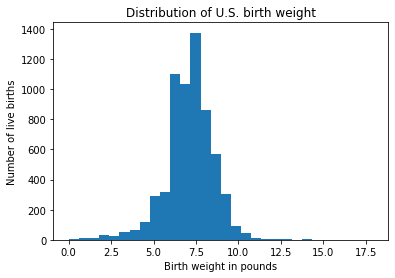

In [89]:
plt.hist(birth_weight.dropna(), bins=30)

plt.xlabel('Birth weight in pounds')
plt.ylabel('Number of live births')
plt.title('Distribution of U.S. birth weight');

Pyplot doesn't work with NaNs, so we have to use `dropna`, which makes a new Series that contains only the valid values.

The second argument, `bins`, tells `hist` to divide the range of weights into 30 intervals, called "bins", and count how many values fall in each bin.

The `x` axis is birth weight in pounds, divided into 30 bins.  The `y` axis is the number of births in each bin.  

The distribution looks a little like a bell curve, but the tail is longer on the left than on the right; that is, there are more light babies than heavy babies.

That makes sense because the distribution includes some babies that were born preterm.  

**Exercise:** `hist` takes keyword arguments that specify the type and appearance of the histogram.  Find the documentation of `hist` and see if you can figure out how to plot the histogram as an unfilled line.

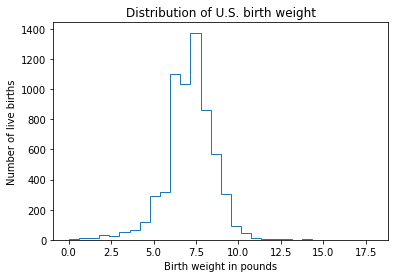

In [90]:
# Solution goes here
plt.hist(birth_weight.dropna(), bins=30, histtype='step')

plt.xlabel('Birth weight in pounds')
plt.ylabel('Number of live births')
plt.title('Distribution of U.S. birth weight');

**Exercise:** As we saw in a previous exercise, the NSFG dataset includes a column called `agecon` that records age at conception for each pregnancy. 

- Select this column from the DataFrame, divide by 100 to convert it to years, and assign it to a variable called `agecon`.

- Plot the histogram of these values with 20 bins.

- Label the `x` and `y` axes appropriately.

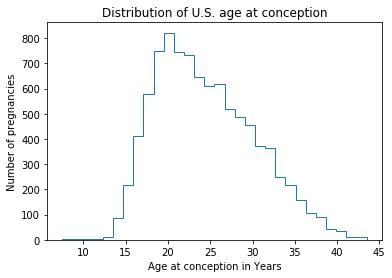

In [91]:
# Solution goes here
plt.hist(agecon.dropna(), bins=30, histtype='step')

plt.xlabel('Age at conception in Years')
plt.ylabel('Number of pregnancies')
plt.title('Distribution of U.S. age at conception');

## Boolean series

We have seen that the distribution of birth weights is "skewed to the left"; that is, there are more light babies than heavy ones and they are farther from the mean.

That's because preterm babies tend to be lighter.  The most common duration for pregnancy is 39 weeks, which is "full term"; "preterm" is usually defined to be less than 37 weeks.

To see which babies are preterm, we can use `prglngth`, which records pregnancy length in weeks.

To identify babies that were born preterm, we can compare `prglngth` to 37.

In [92]:
preterm = (nsfg['prglngth'] < 37)
preterm.dtype

dtype('bool')

When you compare a Series to a value, the result is a Boolean Series; that is, each element is a Boolean value, True or False.  In this case, it's True for each preterm baby and False otherwise.  We can use `head` to see the first 5 elements.

In [93]:
preterm.head()

0    False
1     True
2     True
3     True
4    False
Name: prglngth, dtype: bool

If you compute the sum of a Boolean Series, it treats True as 1 and False as 0, so the sum is the number of Trues, which is the number of preterm babies, about 3700.

In [94]:
preterm.sum()

3742

If you compute the mean, you get the *fraction* of Trues; in this case, it's close to 0.4; that is, the durations of 40% of the pregnancies are less than 37 weeks.

In [95]:
preterm.mean()

0.39987176747168196

However, this result might be misleading because it includes all pregnancy outcomes, not just live births.

We can create another Boolean Series to indicate which pregnancies ended in live birth:

In [0]:
live = (nsfg['outcome'] == 1)

Now we can use the logical operator `&` to identify pregnancies where the outcome is a preterm live birth: 

In [97]:
live_preterm = (live & preterm)
live_preterm.mean()

0.09724300064116265

**Exercise:** Of all live births, what fraction are preterm?

In [98]:
# Solution goes here
# About 14 percent.
live_preterm.sum() / live.sum()

0.14023732470334413

The other common logical operators are:
    
* `|`, which is the OR operator; for example `live | preterm` is true if either `live` is true, or `preterm` is true, or both.

* `~`, which is the NOT operator; for example `~live` is true if `live` is false or NaN.

The logical operators treat NaN the same as False.  So you should be careful about using the NOT operator with a Series that contains NaN values.  

For example, `~preterm` would include full term pregnancies, which is probably what you want, and pregnancies with unknown length, which might not be.

**Exercise:** What fraction pregnancies are full term, that is, 37 weeks or more?

Of all live births, what fraction are full term?

In [99]:
# Solution goes here
outcomes = nsfg['outcome']
fullterm = (nsfg['prglngth'] >= 37)
## 60 percent of pregnancies are full-term.
fullterm.sum()/outcomes.count()


0.600128232528318

In [100]:
# Solution goes here
live = (nsfg['outcome'] == 1)
# 86% go full term.
fullterm.sum()/live.sum()


0.8654646324549237

## Filtering

We can use a Boolean Series as a filter; that is, we can select only rows that satisfy a condition or meet some criterion.

For example, we can use `preterm` and the bracket operator to select values from `birth_weight`, so `preterm_weight` gets birth weights for preterm babies. 

In [101]:
preterm_weight = birth_weight[preterm]
preterm_weight.mean()

5.577598314606742

To select full-term babies, we can create a Boolean Series like this:

In [0]:
fullterm = (nsfg['prglngth'] >= 37)

And use it to select birth weights for full term babies:

In [103]:
full_term_weight = birth_weight[fullterm]
full_term_weight.mean()

7.372323879231473

As expected, full term babies are heavier, on average, than preterm babies.

To be more explicit, we could also limit the results to live births, like this:

In [104]:
full_term_weight = birth_weight[live & fullterm]
full_term_weight.mean()

7.372323879231473

But in this case it doesn't make a difference because `birth_weight` is only valid for live births.

**Exercise:** Let's see if there is a difference in weight between single births and multiple births (twins, triplets, etc.).

The variable `nbrnaliv` represents the number of babies born alive from a pregnancy.  Here's a cleaned version of this variable:

In [0]:
nbrnaliv_clean = nsfg['nbrnaliv'].replace(8, np.nan)

Use `nbrnaliv_clean` and `live` to create a Boolean series called `multiple` that is true for multiple live births.  

Of all live births, what fraction are multiple births?

In [140]:
# Solution goes here
multiple = (nbrnaliv_clean >= 2) & (live == 1)
# 16/1000 are multiple births.
multiple.sum()/nbrnaliv_clean.sum()

0.01592356687898089

In [141]:
# 16/1000 are multiple births. 
multiple.sum()/live.sum()

0.016181229773462782

**Exercise:** Make a Boolean series called `single` that is true for single live births.

Of all single births, what fraction are preterm?

Of all multiple births, what fraction are preterm?

In [0]:
# Solution goes here
single = (nbrnaliv_clean == 1) & (live == 1)

In [143]:
# Solution goes here
preterm_single = preterm & single
# 13 percent.
preterm_single.sum()/single.sum()

0.1332497256623295

In [144]:
# Solution goes here
preterm_mult = preterm & multiple
# 56 percent.
preterm_mult.sum()/multiple.sum()

0.5619047619047619

**Exercise:** What is the average birth weight for live, single, full-term births?

In [145]:
# Solution goes here
# 7.39 lbs
full_term_weight = birth_weight[single & live & fullterm]
full_term_weight.mean()

7.385643450184502

## Resampling

We are almost ready to compute the average birth weight, but there's one more thing we have to do: resampling.

The NSFG is not exactly representative of the U.S. population; by design, some groups are more likely to appear in the sample than others; that is, they are "oversampled".  Oversampling helps to ensure that you have enough people in every subgroup to get reliable statistics, but it makes the analysis a little more complicated.

However, we can correct for oversampling by "resampling".  The key is that each pregnancy in the dataset has a "sampling weight" that indicates how many pregnancies it represents.  In the `nsfg` DataFrame, the sampling weight is stored in a column named `wgt2013_2015`.

Here's what it looks like.

In [146]:
nsfg['wgt2013_2015'].describe()

count     9358.000000
mean     10759.200147
std      11400.179222
min       1859.105000
25%       4340.053407
50%       7062.994158
75%      12629.322982
max      75399.410000
Name: wgt2013_2015, dtype: float64

The lowest value in this column is about 1859, which means that a pregnancy with that weight represents 1859 total pregnancies in the population.

The highest weight is about 75399, which means that this observed pregnancy represents substantially more pregnancies in the population.

To take these weights into account, we can resample the DataFrame, which means that we draw a new random sample from the rows in the DataFrame using a weighted sampling process so that rows with higher weights are more likely than rows with lower weights.

DataFrame provides a method called `sample` that does what we want:

In [0]:
n = len(nsfg)
weights = nsfg['wgt2013_2015']
sample = nsfg.sample(n, 
                     replace=True, 
                     weights=weights)

Here's what the arguments mean:

* The size of the sample, `n`, is the same as the size of the DataFrame.

* `replace` means that sampling is done "with replacement", so some rows appear in the sample more than once and some might not appear at all.

* `weights` are used to weight the sampling process, so each rows appears in the sample with frequency proportional to its weight.

**Exercise:** Now let's bring it all together.  To test your recall, try to do this exercise without referring back to previous code.

1. From `sample`, extract `birthwgt_lb1` and `birthwgt_oz1` and assign them to `pounds` and `ounces`.

2. Clean both variables by replacing `98` and `99` with NaN.

3. Compute total birthweight in pounds and display the mean.

4. Compute Boolean Series for live, single, and full-term babies.

5. Select birthweights for live, single, full-term babies and display their mean weight.

In [151]:
# Solution goes here
pounds = sample['birthwgt_lb1']
ounces = sample['birthwgt_oz1']
pounds_clean = pounds.replace([98, 99], np.nan)
ounces_clean = pounds.replace([98, 99], np.nan)

kilograms_clean = (pounds_clean + ounces_clean / 16)/2.2 
kilograms_clean.mean()

3.253510003509939

In [156]:
# Solution goes here
nbrnaliv_clean = sample['nbrnaliv'].replace(8, np.nan)
single = nbrnaliv_clean == 1
live = (sample['outcome'] == 1)
fullterm = (sample['prglngth'] >= 37)
full_term_weight = kilograms_clean[single & live & fullterm]
full_term_weight.mean()

3.3657897095733054

Most of the time, you will find that the resampled data yields a slightly higher estimate for the average birth weight of single, full-term births in the U.S., compared to the unresampled data.

But resampling is a random process, so the results will be slightly different each time you run it.  Later we will see how we can use this variability to quantify the precision of the estimate.